<a href="https://colab.research.google.com/github/Smart-Pigs/Depth-Images/blob/main/Weight_Estimation_Simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make sure you have these folders as shortcuts in your drive - 

  /content/gdrive/MyDrive/Morota-video-data/ 
  
  /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/

In [1]:
#Mount Google Drive 
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


### Data Loading

In [17]:
#@markdown Select resolution of input dataset and weeks of data

Resolution = "512"  #@param ['1280', '512', '256', '128', '64', '32', '16']
All_Weeks = True #@param {type:"boolean"}
Weeks_1_2 = False #@param {type:"boolean"}
Weeks_3_4 = False #@param {type:"boolean"}
Weeks_5_6 = False #@param {type:"boolean"}
Weeks_7_8 = False #@param {type:"boolean"}
Weeks_9_10 = False #@param {type:"boolean"}

if Resolution == "1280":
  if All_Weeks == True:
    !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK1-2.zip .
    !unzip -qq WEEK1-2.zip -d .
    !rm -rf *WEEK*.zip
    !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK3-4.zip .
    !unzip -qq WEEK3-4.zip -d .
    !rm -rf *WEEK*.zip
    !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK5-6.zip .
    !unzip -qq WEEK5-6.zip -d .
    !rm -rf *WEEK*.zip
    !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK7-8.zip .
    !unzip -qq WEEK7-8.zip -d .
    !rm -rf *WEEK*.zip
    !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK9-10.zip .    
    !unzip -qq WEEK9-10.zip -d .
    !rm -rf *WEEK*.zip
  if Weeks_1_2 == True:
    !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK1-2.zip .
    !unzip -qq WEEK1-2.zip -d .
    !rm -rf *WEEK*.zip
  if Weeks_3_4 == True:
    !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK3-4.zip .
    !unzip -qq WEEK3-4.zip -d .
    !rm -rf *WEEK*.zip
  if Weeks_5_6 == True:
    !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK5-6.zip .
    !unzip -qq WEEK5-6.zip -d .
    !rm -rf *WEEK*.zip
  if Weeks_7_8 == True:  
    !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK7-8.zip .
    !unzip -qq WEEK7-8.zip -d . 
    !rm -rf *WEEK*.zip 
  if Weeks_9_10 == True:
    !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK9-10.zip .
    !unzip -qq WEEK9-10.zip -d .
    !rm -rf *WEEK*.zip

if Resolution == "512":
  !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK1-10_512.zip .
  !unzip -qq SQUARE_WEEK1-10_512.zip -d .
  !rm -rf *WEEK*.zip

if Resolution == "256":
  !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK1-10_256.zip .
  !unzip -qq SQUARE_WEEK1-10_256.zip -d .
  !rm -rf *WEEK*.zip

if Resolution == "128":
  !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK1-10_128.zip .
  !unzip -qq SQUARE_WEEK1-10_128.zip -d .
  !rm -rf *WEEK*.zip

if Resolution == "64":
  !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK1-10_64.zip .
  !unzip -qq SQUARE_WEEK1-10_64.zip -d .
  !rm -rf *WEEK*.zip

if Resolution == "32":
  !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK1-10_32.zip .
  !unzip -qq SQUARE_WEEK1-10_32.zip -d .
  !rm -rf *WEEK*.zip

if Resolution == "16":
  !cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/SQUARE/SQUARE_WEEK1-10_16.zip .
  !unzip -qq SQUARE_WEEK1-10_16.zip -d .
  !rm -rf *WEEK*.zip
      

### Mapping Table Input

In [18]:
import pandas as pd

In [19]:
final_map = pd.read_csv("/content/gdrive/MyDrive/Morota-video-data/final_mapping.csv")

In [20]:
final_map

,image_path,Date,Pig,weight,Week
0,Week1/20210922/20210922_3330_b/_Depth_4683.jpg,20210922,3330,15.5,1
1,Week1/20210922/20210922_3330_b/_Depth_4778.jpg,20210922,3330,15.5,1
2,Week1/20210922/20210922_3330_b/_Depth_4579.jpg,20210922,3330,15.5,1
3,Week1/20210922/20210922_3330_b/_Depth_4578.jpg,20210922,3330,15.5,1
4,Week1/20210922/20210922_3330_b/_Depth_4584.jpg,20210922,3330,15.5,1
...,...,...,...,...,...
96220,Week10/20211119/20211119_3342/_Depth_3504.jpg,20211119,3342,56.6,10
96221,Week10/20211119/20211119_3342/_Depth_3318.jpg,20211119,3342,56.6,10
96222,Week10/20211119/20211119_3342/_Depth_3476.jpg,20211119,3342,56.6,10
96223,Week10/20211119/20211119_3342/_Depth_3169.jpg,20211119,3342,56.6,10


In [21]:
if All_Weeks == True:
  weeks = final_map
if Weeks_1_2 == True:
  weeks = final_map[(final_map['Week']==1) | (final_map['Week']==2)]
if Weeks_1_2 == True and Weeks_3_4 == True:  
  weeks = final_map[(final_map['Week']==1) | (final_map['Week']==2) | (final_map['Week']==3) | (final_map['Week']==4)]
if Weeks_1_2 == True and Weeks_3_4 == True and Weeks_5_6 == True:  
  weeks = final_map[(final_map['Week']==1) | (final_map['Week']==2) | (final_map['Week']==3) | (final_map['Week']==4) | (final_map['Week']==5) | (final_map['Week']==6)]
if Weeks_1_2 == True and Weeks_3_4 == True and Weeks_5_6 == True and Weeks_7_8 == True:  
  weeks = final_map[(final_map['Week']==1) | (final_map['Week']==2) | (final_map['Week']==3) | (final_map['Week']==4) | (final_map['Week']==5) | (final_map['Week']==6) | (final_map['Week']==7) | (final_map['Week']==8)]
if Weeks_1_2 == True and Weeks_3_4 == True and Weeks_5_6 == True and Weeks_7_8 == True and Weeks_9_10 == True:  
  weeks = final_map[(final_map['Week']==1) | (final_map['Week']==2) | (final_map['Week']==3) | (final_map['Week']==4) | (final_map['Week']==5) | (final_map['Week']==6) | (final_map['Week']==7) | (final_map['Week']==8) | (final_map['Week']==9) | (final_map['Week']==10)]

In [22]:
weeks

,image_path,Date,Pig,weight,Week
0,Week1/20210922/20210922_3330_b/_Depth_4683.jpg,20210922,3330,15.5,1
1,Week1/20210922/20210922_3330_b/_Depth_4778.jpg,20210922,3330,15.5,1
2,Week1/20210922/20210922_3330_b/_Depth_4579.jpg,20210922,3330,15.5,1
3,Week1/20210922/20210922_3330_b/_Depth_4578.jpg,20210922,3330,15.5,1
4,Week1/20210922/20210922_3330_b/_Depth_4584.jpg,20210922,3330,15.5,1
...,...,...,...,...,...
96220,Week10/20211119/20211119_3342/_Depth_3504.jpg,20211119,3342,56.6,10
96221,Week10/20211119/20211119_3342/_Depth_3318.jpg,20211119,3342,56.6,10
96222,Week10/20211119/20211119_3342/_Depth_3476.jpg,20211119,3342,56.6,10
96223,Week10/20211119/20211119_3342/_Depth_3169.jpg,20211119,3342,56.6,10


In [23]:
image_paths = weeks['image_path'].values
labels = weeks['weight'].values

In [24]:
image_paths

array(['Week1/20210922/20210922_3330_b/_Depth_4683.jpg',
       'Week1/20210922/20210922_3330_b/_Depth_4778.jpg',
       'Week1/20210922/20210922_3330_b/_Depth_4579.jpg', ...,
       'Week10/20211119/20211119_3342/_Depth_3476.jpg',
       'Week10/20211119/20211119_3342/_Depth_3169.jpg',
       'Week10/20211119/20211119_3342/_Depth_3022.jpg'], dtype=object)

In [25]:
labels

array([15.5, 15.5, 15.5, ..., 56.6, 56.6, 56.6])

### Dataset

In [26]:
import tensorflow as tf
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))

In [28]:
IMG_SIZE = 224

def preprocess_image(image_path, label):
    img = tf.io.read_file(image_path)
    #img = tf.image.decode_jpeg(img, channels=1)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = tf.cast(img, tf.float32) / 255.0
    return img, label

In [29]:
dataset = dataset.map(preprocess_image)

In [30]:
print("Number of elements in the dataset:", tf.data.experimental.cardinality(dataset).numpy())

Number of elements in the dataset: 96225


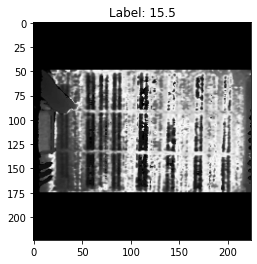

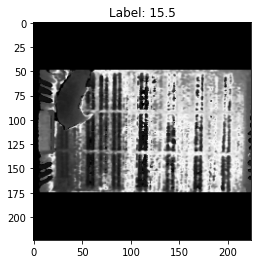

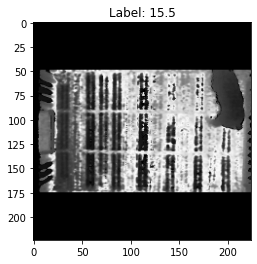

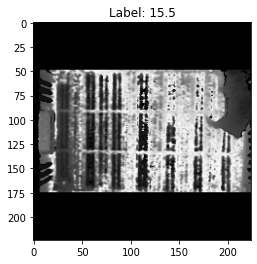

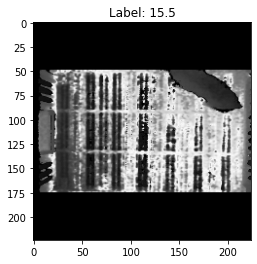

In [31]:
for image, label in dataset.take(5):
    plt.imshow(tf.squeeze(image), cmap='gray')
    plt.title(f"Label: {label.numpy()}")
    plt.show()

In [33]:
train_size = int(0.8 * len(weeks))
test_size = len(weeks) - train_size

In [34]:
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

In [35]:
batch_size = 512

train_dataset = train_dataset.shuffle(train_size)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

### Model Config and Training

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [37]:
model.compile(optimizer='adam', loss='mse', metrics=['mae','mape'])

In [ ]:
history = model.fit(train_dataset, epochs=50, validation_data=test_dataset)

Epoch 1/50


In [ ]:
test_loss, test_mae = model.evaluate(test_dataset)
print('Test mean absolute error:', test_mae)